In [1]:
import pickle
import scipy as sp
import numpy as np
import pandas as pd
import anndata
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from bioinfokit import analys, visuz
from matplotlib.pyplot import rc_context
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from tqdm import tqdm
from IPython.display import display_html
def display2(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

from functools import reduce
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
import matplotlib

In [12]:
cmap = custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list( 'custom',plt.cm.Reds((np.linspace(0,1,200)**(2))))


In [7]:
## Let's work on nematostella and hydra enriched motifs 
NV = pd.read_csv("./ChromVARDeviations/NV_chromvarzscore.csv",sep=",",index_col=0)
NV['NV_pos_avg'] = NV[['ELAV_pos_1','ELAV_pos_2']].mean(axis=1)
NV['NV_neg_avg'] = NV[['ELAV_neg_1','ELAV_neg_2']].mean(axis=1)
NV_average = NV[['NV_pos_avg','NV_neg_avg']]
#NV_average = NV_average[NV_average.NV_pos_avg > NV_average.NV_neg_avg]
#NV_average

In [8]:
hydra = pd.read_csv("./ChromVARDeviations/HV_chromvarzscore.csv",sep=",", index_col=0)
hydra['nGreen_avg'] = hydra[['nGreen1','nGreen2','nGreen3','nGreen4']].mean(axis=1)
hydra['PN_avg'] = hydra[['PN1','PN2']].mean(axis=1)
hydra['whole_avg'] = hydra[['AEP1','AEP2','AEP3']].mean(axis=1)
hydra_avg = hydra[['nGreen_avg','PN_avg','whole_avg']]
hydra_avg['nGreen_PN_max'] = hydra_avg[['nGreen_avg', 'PN_avg']].max(axis=1)
#hydra_avg = hydra_avg[hydra_avg.nGreen_PN_max > hydra_avg.whole_avg]
#hydra_avg

/home/gary/anaconda2/envs/jgpy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
NV_list = NV.index[(NV['NV_pos_avg']>1)& (NV['NV_neg_avg']<0)].tolist()

In [30]:
nGreen_list = hydra.index[(hydra['nGreen_avg']>1) & (hydra['whole_avg']<0)].tolist()
PN_list = hydra.index[(hydra['PN_avg']>1) & (hydra['whole_avg']<0)].tolist()

In [31]:
# This is to pull out the list for Bo 
hydra_list = sorted(list(set(nGreen_list) | set(PN_list) ))
hydra_NV_shared = (reduce(np.intersect1d, [list(NV_list), list(hydra_list)]))
## Let's take intersection of hydra to neural motifs in flatworms 
hydra_flatworms = (reduce(np.intersect1d, [list(hydra_list), list(neural_motif)]))
hydra_NV_flatworms = (reduce(np.intersect1d, [list(hydra_NV_shared), list(neural_motif)]))
NV_flatworms = (reduce(np.intersect1d, [list(NV_list), list(neural_motif)]))


In [32]:
hydra_NV_flatworms = hydra_NV_flatworms
hydra_NV_flatworms

array(['JC_0062|PLAG1(0.000)', 'JC_0193|BACH1(0.087)',
       'JC_0255|POU4F3(0.087)', 'JC_0283|TFAP2C(var.3)(0.009)',
       'WC_1527|ASCL1(var.2)(6.131)'], dtype='<U32')

In [4]:
## This is to rearrange in the order we want
hydra_NV_flatworms = ['JC_0062|PLAG1(0.000)', 'JC_0193|BACH1(0.087)','JC_0255|POU4F3(0.087)', 'JC_0283|TFAP2C(var.3)(0.009)','WC_1527|ASCL1(var.2)(6.131)']

hydra_NV_shared = ['JC_0029|NR1I2(0.361)', 'JC_0047|Dlx2(0.053)', 'JC_0218|MSC(0.281)', 'JC_0232|ZEB1(0.171)', 
                   'JC_0250|HNF1B(0.014)', 'JC_0268|ZBED1(0.000)', 'JC_0282|TFAP2A(0.165)', 'JC_0372|NHLH2(0.040)', 'WC_0107|ERF069(0.693)', 
                   'WC_0323|ZBTB32(4.408)', 'WC_0910|ZHD6(4.269)', 'WC_0917|SIX2(3.659)', 'WC_1065|MBP1(0.583)', 'WC_1219|TFAP4(0.410)', 
                   'WC_1294|MYOG(0.992)', 'WC_1352|MYOG(0.909)', 'WC_1464|AT3G10030(6.098)', 'WC_1795|Ascl2(5.571)', 'WC_1913|bHLH18(3.642)', 'WC_2044|ASCL1(var.2)(7.196)']


hydra_flatworms = ['JC_0022|MZF1(var.2)(0.000)', 'JC_0030|SOX8(0.153)', 'JC_0031|AP1(0.211)', 'JC_0032|RBPJ(0.338)', 'JC_0054|EWSR1-FLI1(0.000)', 
                   'JC_0094|MIG3(0.096)', 'JC_0118|MSN4(0.063)', 'JC_0184|ttk(0.000)', 'JC_0192|MEF2A(0.246)', 'JC_0197|SOX4(0.087)', 'JC_0211|blmp-1(0.450)',
                   'JC_0216|eor-1(0.028)', 'JC_0238|KLF4(0.340)', 'JC_0257|SPIC(0.018)', 'JC_0303|PHYPADRAFT_140773(0.030)', 'JC_0349|BPC6(0.350)', 'JC_0350|BPC5(0.000)',
                   'JC_0373|NR1D2(0.085)', 'JC_0381|VEZF1(0.259)', 'JC_0401|Wt1(0.209)', 'JC_0420|ZNF263(0.094)', 'WC_0031|KLF4(3.611)', 'WC_0098|AGL13(9.419)', 
                   'WC_0113|THAP1(2.879)', 'WC_0121|DOF5.3(1.591)', 'WC_0149|RAMOSA1(4.353)', 'WC_0171|ZNF24(3.555)', 'WC_0181|NR2F1(4.283)', 'WC_0201|NFATC1(1.093)', 
                   'WC_0271|cre-1(1.589)', 'WC_0282|ZNF24(3.836)', 'WC_0334|KLF2(3.176)', 'WC_0386|Clamp(2.490)', 'WC_0398|NHP6B(1.711)', 'WC_0412|ceh-48(2.558)', 
                   'WC_0416|ZNF740(3.308)', 'WC_0469|MEF2A(1.102)', 'WC_0470|DOF2.4(1.076)', 'WC_0472|ZNF148(2.996)', 'WC_0484|MEF2A(2.775)', 'WC_0485|VEZF1(4.789)', 
                   'WC_0496|REF6(6.031)', 'WC_0509|br(var.2)(3.417)', 'WC_0514|Trl(1.901)', 'WC_0524|br(var.2)(4.005)', 'WC_0529|Trl(2.269)', 'WC_0575|TBF1(2.074)', 
                   'WC_0578|ZBTB32(6.563)', 'WC_0614|KLF4(2.548)', 'WC_0618|Trl(2.877)', 'WC_0651|br(var.2)(1.279)', 'WC_0719|StBRC1(1.323)', 'WC_0725|E2F6(2.941)', 
                   'WC_0755|Trl(3.108)', 'WC_0765|ZBTB33(7.467)', 'WC_0781|ZNF384(1.164)', 'WC_0786|Trl(4.941)', 'WC_0823|KLF4(1.552)', 'WC_0825|Trl(3.675)',
                   'WC_0826|GATA15(3.109)', 'WC_0827|SPL4(2.538)', 'WC_0885|EGR1(3.003)', 'WC_0912|DOF2.4(0.430)', 'WC_0920|EGR4(3.454)', 'WC_1071|br(var.2)(3.839)',
                   'WC_1093|SPI1(2.470)', 'WC_1236|ZHD6(2.429)', 'WC_1240|ABI3(0.466)', 'WC_1252|AT5G02460(5.535)', 'WC_1302|ARF27(2.872)', 'WC_1309|Foxl2(3.276)', 
                   'WC_1367|NFATC3(0.894)', 'WC_1384|SPI1(3.724)', 'WC_1590|NHP6B(3.405)', 'WC_1645|AHL12(3.240)', 'WC_1968|ASCL1(var.2)(6.373)', 'WC_1973|ZNF148(1.330)']

NV_flatworms = ['JC_0011|REL(0.162)', 'JC_0099|CAT8(0.184)', 'JC_0136|RDS2(0.480)', 'JC_0266|EGR2(0.149)', 'JC_0275|NFKB2(0.067)', 'JC_0318|RELB(0.265)', 'WC_1528|daf-12(5.305)']


In [6]:
shared = hydra_NV_flatworms + hydra_NV_shared + NV_flatworms + hydra_flatworms
shared

['JC_0062|PLAG1(0.000)',
 'JC_0193|BACH1(0.087)',
 'JC_0255|POU4F3(0.087)',
 'JC_0283|TFAP2C(var.3)(0.009)',
 'WC_1527|ASCL1(var.2)(6.131)',
 'JC_0029|NR1I2(0.361)',
 'JC_0047|Dlx2(0.053)',
 'JC_0218|MSC(0.281)',
 'JC_0232|ZEB1(0.171)',
 'JC_0250|HNF1B(0.014)',
 'JC_0268|ZBED1(0.000)',
 'JC_0282|TFAP2A(0.165)',
 'JC_0372|NHLH2(0.040)',
 'WC_0107|ERF069(0.693)',
 'WC_0323|ZBTB32(4.408)',
 'WC_0910|ZHD6(4.269)',
 'WC_0917|SIX2(3.659)',
 'WC_1065|MBP1(0.583)',
 'WC_1219|TFAP4(0.410)',
 'WC_1294|MYOG(0.992)',
 'WC_1352|MYOG(0.909)',
 'WC_1464|AT3G10030(6.098)',
 'WC_1795|Ascl2(5.571)',
 'WC_1913|bHLH18(3.642)',
 'WC_2044|ASCL1(var.2)(7.196)',
 'JC_0011|REL(0.162)',
 'JC_0099|CAT8(0.184)',
 'JC_0136|RDS2(0.480)',
 'JC_0266|EGR2(0.149)',
 'JC_0275|NFKB2(0.067)',
 'JC_0318|RELB(0.265)',
 'WC_1528|daf-12(5.305)',
 'JC_0022|MZF1(var.2)(0.000)',
 'JC_0030|SOX8(0.153)',
 'JC_0031|AP1(0.211)',
 'JC_0032|RBPJ(0.338)',
 'JC_0054|EWSR1-FLI1(0.000)',
 'JC_0094|MIG3(0.096)',
 'JC_0118|MSN4(0.063)',
 'J

In [9]:
merged = pd.concat([NV_average,hydra_avg,],axis=1)


In [10]:
merged = merged[["NV_pos_avg","NV_neg_avg","nGreen_PN_max","whole_avg"]]

In [11]:
merged = merged[merged.index.isin(shared)]

In [12]:
merged = merged.loc[shared,:]

In [13]:
merged_counts = merged.to_numpy()

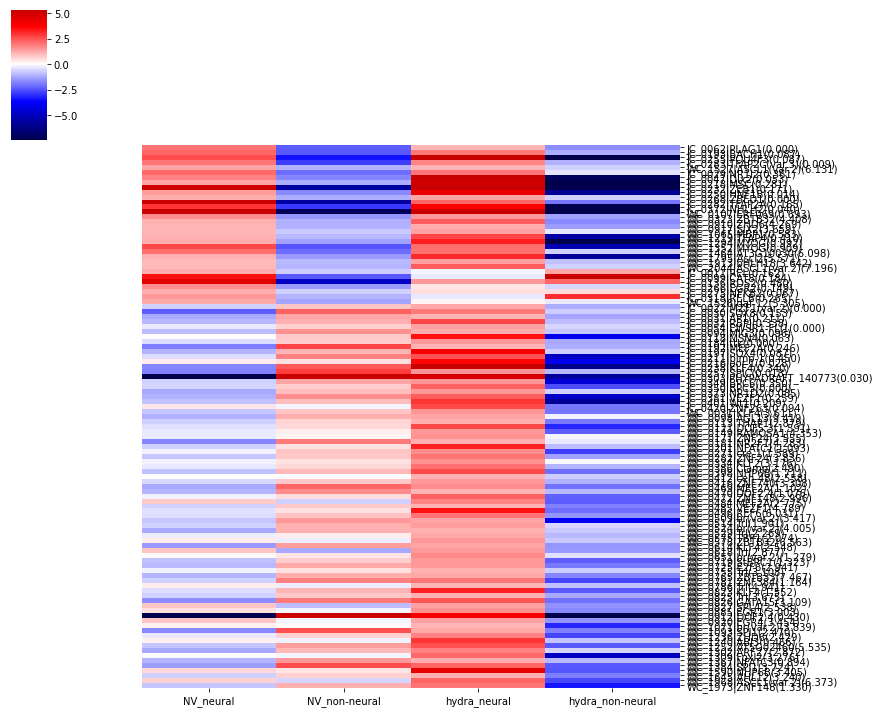

In [14]:
from matplotlib import colormaps
g = sns.clustermap(merged_counts,robust=True,row_cluster=False,col_cluster=False,center=0,cmap='seismic')
g.ax_heatmap.set_yticks(np.arange(merged_counts.shape[0])+0.5)
g.ax_heatmap.set_yticklabels(shared, rotation=0)
g.ax_heatmap.set_xticks(np.arange(merged_counts.shape[1])+0.5)
label = ['NV_neural','NV_non-neural','hydra_neural','hydra_non-neural']
g.ax_heatmap.set_xticklabels(label, rotation=0)
plt.savefig('./Plots/FigS5/PanelS5e.svg',format='svg')